In [1]:
# %% [markdown]
# # 06 - Price Visualization & Charts
# ## Advanced Financial Charting
#
# **Features:** Candlestick charts, Technical indicators, Interactive plots

In [2]:
# CELL 1: Setup and Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration
TICKERS = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]
PRICES_DIR = "../data/price"
TECHNICAL_DIR = "../data/processed/technical_indicators"

# Styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
company_colors = {'AAPL': '#A2AAAD', 'AMZN': '#FF9900', 'GOOG': '#4285F4', 
                  'META': '#1877F2', 'MSFT': '#737373', 'NVDA': '#76B900'}

print("📈 Price Visualization & Analysis")
print(f"💰 Analyzing: {TICKERS}")

📈 Price Visualization & Analysis
💰 Analyzing: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


In [3]:
# CELL 2: Load Price Data (FIXED)
print("📁 LOADING PRICE DATA...")
print("=" * 50)

all_data = []
for ticker in TICKERS:
    file_path = os.path.join(PRICES_DIR, f"{ticker}.csv")
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)
            # FIX: Ensure Date column is properly converted to datetime
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            # Remove any rows with invalid dates
            df = df.dropna(subset=['Date'])
            df['Stock'] = ticker
            all_data.append(df)
            print(f"✅ {ticker}: {len(df)} records")
        except Exception as e:
            print(f"❌ Error loading {ticker}: {e}")
    else:
        print(f"❌ File not found: {file_path}")

if not all_data:
    print("❌ No data loaded! Please run download_data.py first.")
else:
    price_data = pd.concat(all_data, ignore_index=True)
    print(f"\n📊 Total records: {len(price_data)}")
    print(f"📅 Date range: {price_data['Date'].min().date()} to {price_data['Date'].max().date()}")
    
    # Display sample and check data types
    print("\n📋 Data Types:")
    print(price_data.dtypes)
    display(price_data.head(3))

📁 LOADING PRICE DATA...
✅ AAPL: 502 records
✅ AMZN: 502 records
✅ GOOG: 502 records
✅ META: 502 records
✅ MSFT: 502 records
✅ NVDA: 502 records

📊 Total records: 3012
📅 Date range: 2023-11-22 to 2025-11-21

📋 Data Types:
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Stock            object
dtype: object


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock
0,2023-11-22 00:00:00-05:00,189.698496,191.125011,189.044667,189.520172,39617700,0.0,0.0,AAPL
1,2023-11-24 00:00:00-05:00,189.084292,189.114011,187.479453,188.192719,24048300,0.0,0.0,AAPL
2,2023-11-27 00:00:00-05:00,188.143178,188.886161,187.132716,188.014389,40552600,0.0,0.0,AAPL


📈 BASIC PRICE TRENDS


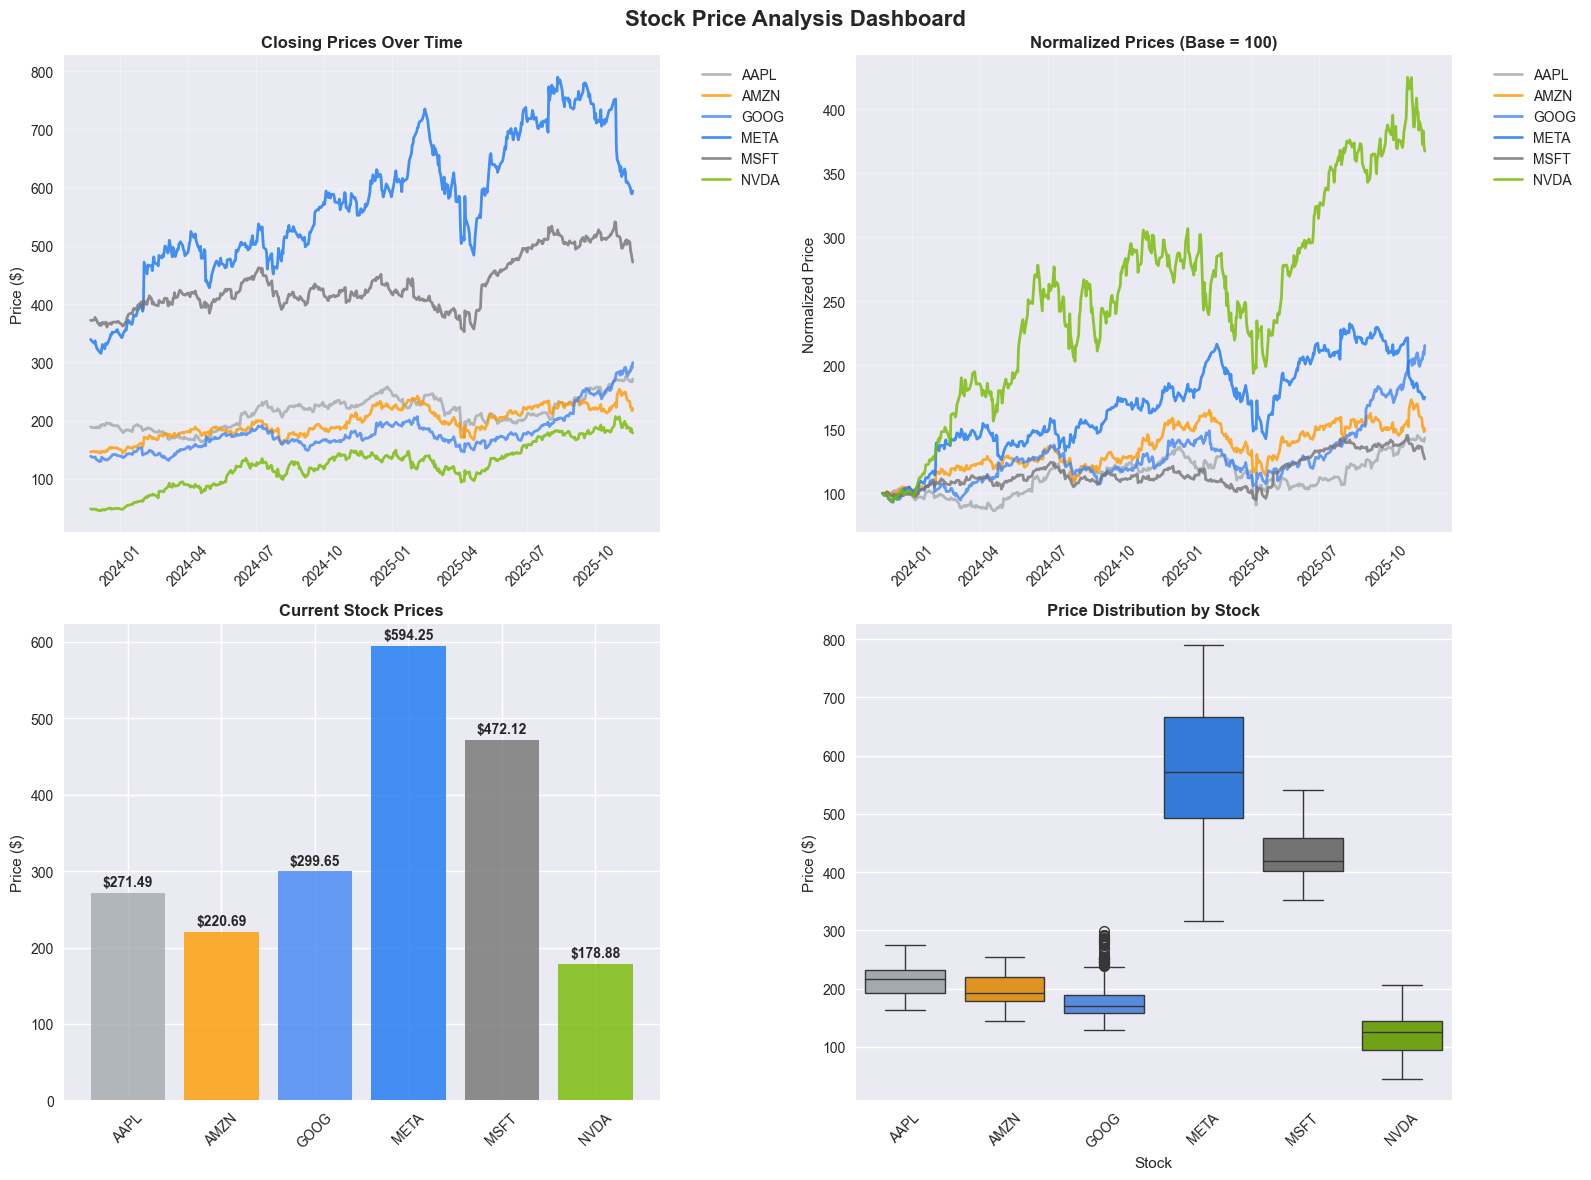

In [4]:
# CELL 3: Basic Price Trends (FIXED)
print("📈 BASIC PRICE TRENDS")
print("=" * 50)

# FIX: Ensure we have data and Date is datetime
if 'price_data' not in locals() or price_data.empty:
    print("❌ No data available. Please run previous cells first.")
else:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Stock Price Analysis Dashboard', fontsize=16, fontweight='bold')

    # 1. All stocks closing prices
    ax1 = axes[0, 0]
    for ticker in TICKERS:
        stock_data = price_data[price_data['Stock'] == ticker].sort_values('Date')
        if not stock_data.empty:
            ax1.plot(stock_data['Date'], stock_data['Close'], 
                     label=ticker, color=company_colors[ticker], linewidth=2, alpha=0.8)
    ax1.set_title('Closing Prices Over Time', fontweight='bold')
    ax1.set_ylabel('Price ($)')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # 2. Normalized prices (base = 100)
    ax2 = axes[0, 1]
    for ticker in TICKERS:
        stock_data = price_data[price_data['Stock'] == ticker].sort_values('Date')
        if not stock_data.empty:
            normalized_price = (stock_data['Close'] / stock_data['Close'].iloc[0]) * 100
            ax2.plot(stock_data['Date'], normalized_price, 
                    label=ticker, color=company_colors[ticker], linewidth=2, alpha=0.8)
    ax2.set_title('Normalized Prices (Base = 100)', fontweight='bold')
    ax2.set_ylabel('Normalized Price')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)

    # 3. Current price comparison
    ax3 = axes[1, 0]
    current_prices = []
    valid_tickers = []
    for ticker in TICKERS:
        stock_data = price_data[price_data['Stock'] == ticker].sort_values('Date')
        if not stock_data.empty:
            current_price = stock_data['Close'].iloc[-1]
            current_prices.append(current_price)
            valid_tickers.append(ticker)

    if valid_tickers:
        bars = ax3.bar(valid_tickers, current_prices, color=[company_colors[t] for t in valid_tickers], alpha=0.8)
        ax3.set_title('Current Stock Prices', fontweight='bold')
        ax3.set_ylabel('Price ($)')
        ax3.tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bar, price in zip(bars, current_prices):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'${price:.2f}', ha='center', va='bottom', fontweight='bold')

    # 4. Price distribution
    ax4 = axes[1, 1]
    if not price_data.empty:
        # FIX: Only use numeric data for boxplot
        plot_data = price_data[['Stock', 'Close']].copy()
        sns.boxplot(data=plot_data, x='Stock', y='Close', ax=ax4, palette=company_colors)
        ax4.set_title('Price Distribution by Stock', fontweight='bold')
        ax4.set_ylabel('Price ($)')
        ax4.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

🔍 INDIVIDUAL STOCK PRICE ANALYSIS

📊 Analyzing AAPL...


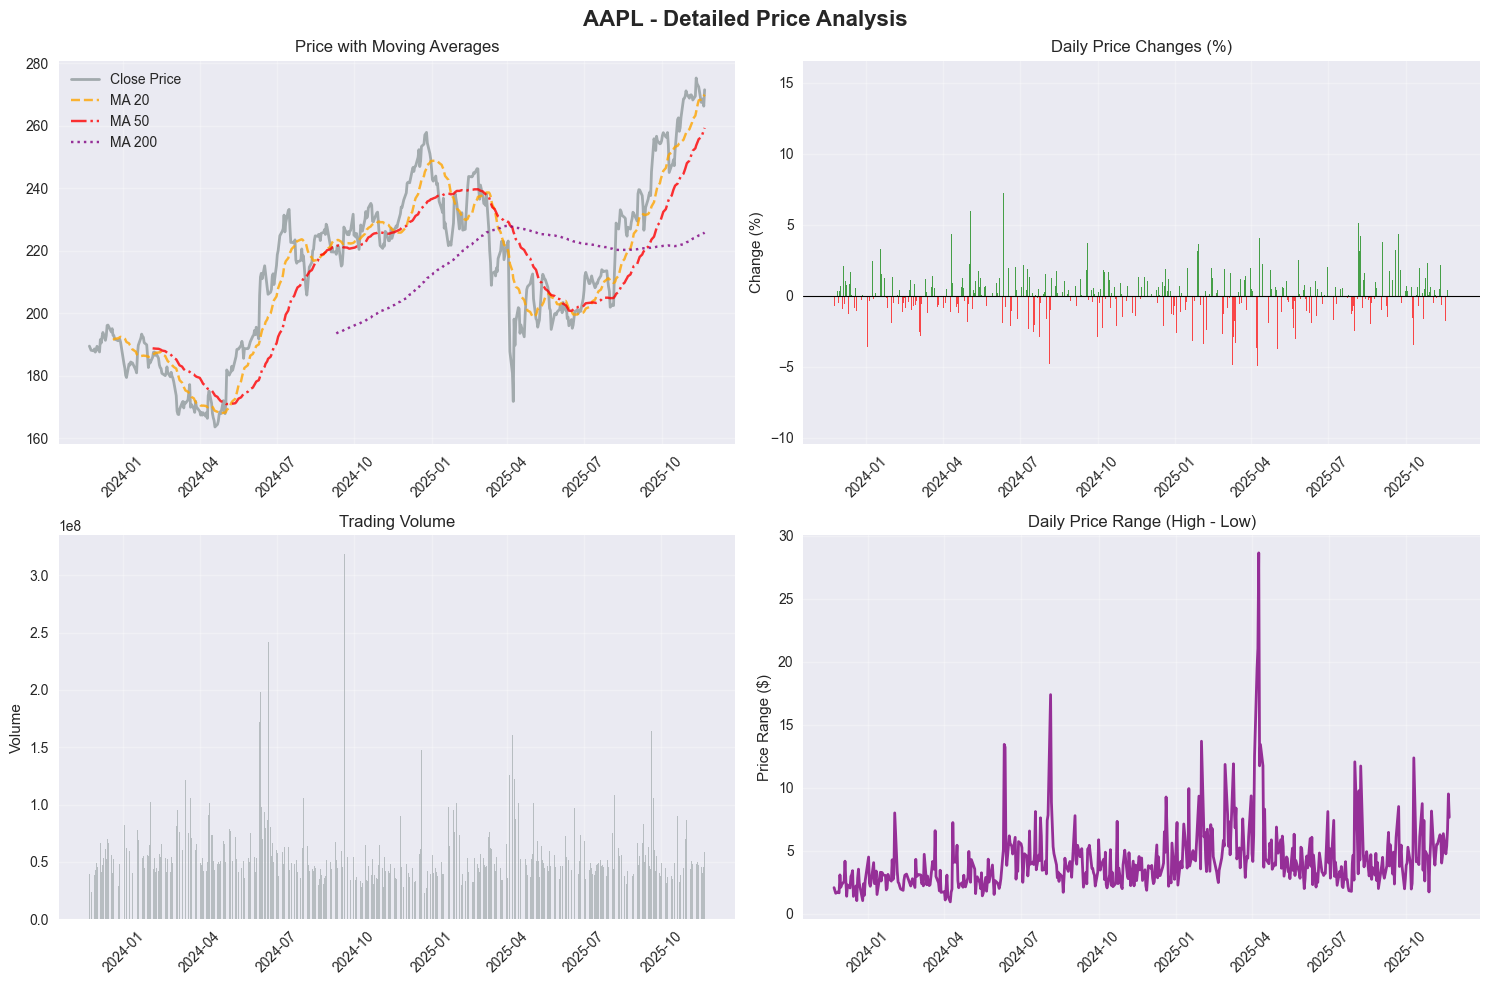

   💰 Current Price: $271.49
   📅 Analysis Period: 2023-11-22 to 2025-11-21
   📈 Total Return: 43.25%
   📊 Average Daily Volume: 56,059,033

📊 Analyzing AMZN...


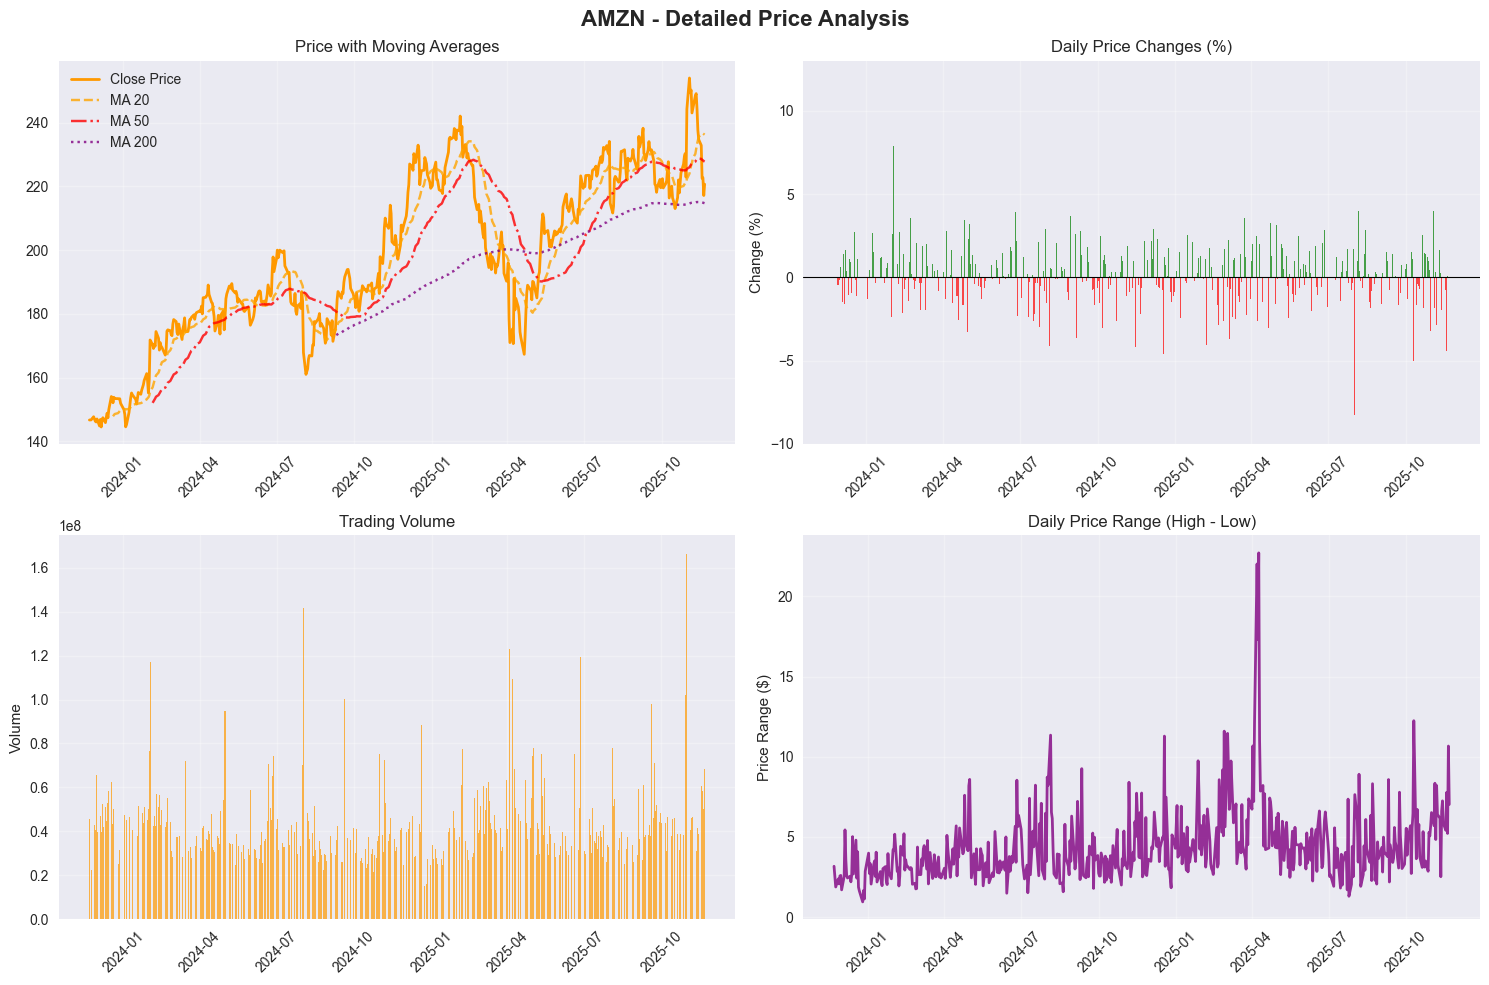

   💰 Current Price: $220.69
   📅 Analysis Period: 2023-11-22 to 2025-11-21
   📈 Total Return: 50.43%
   📊 Average Daily Volume: 43,221,693

📊 Analyzing GOOG...


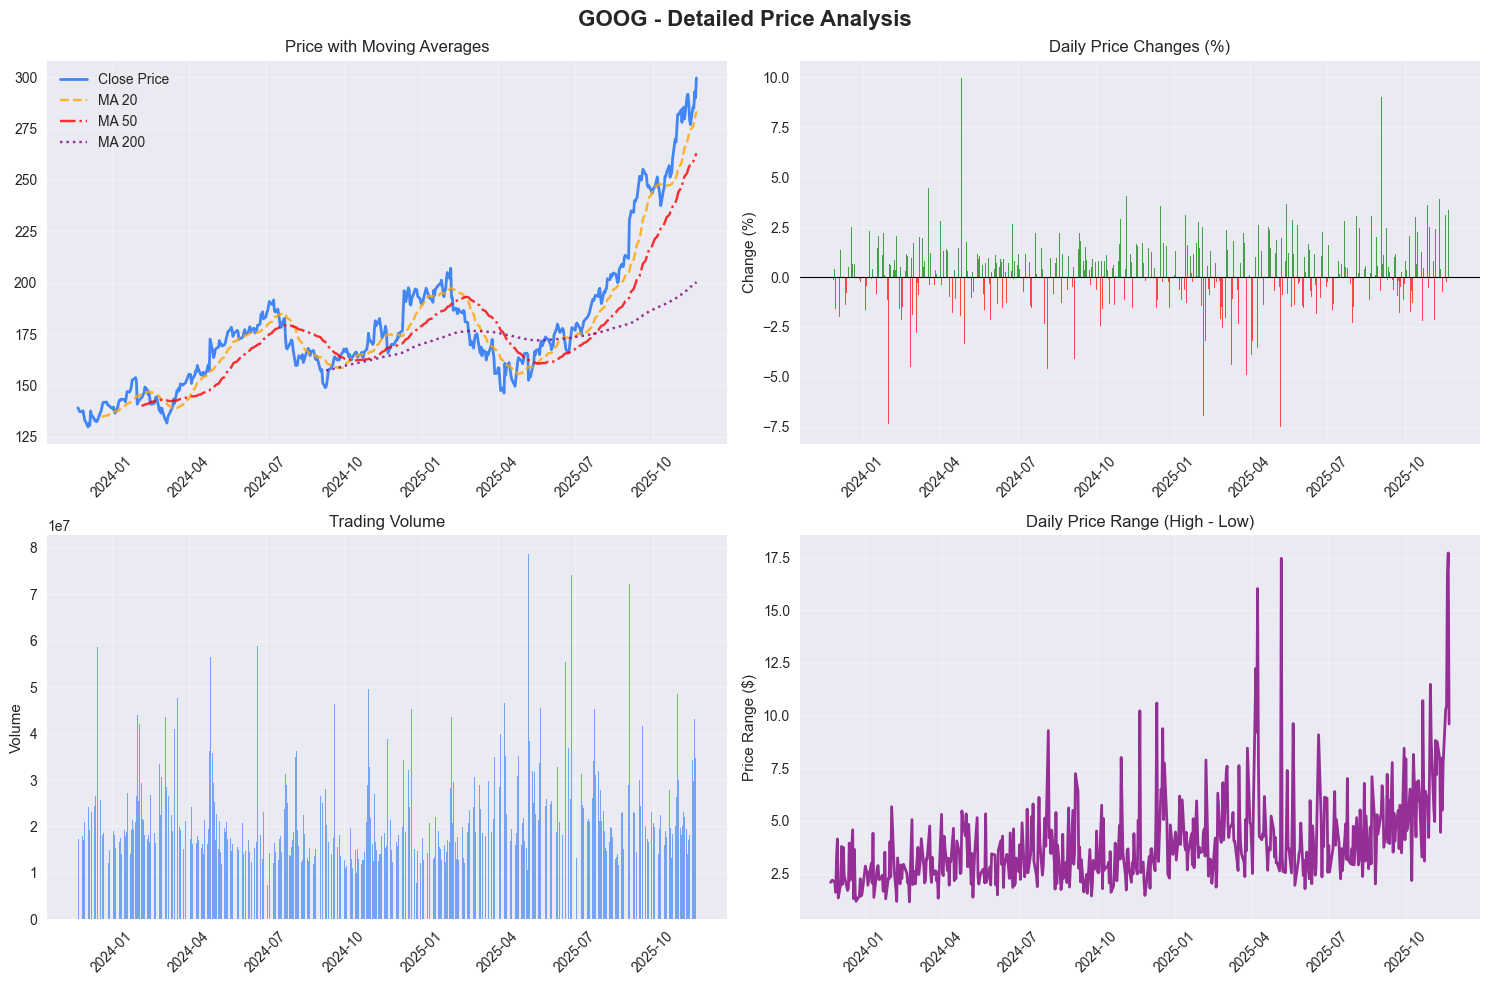

   💰 Current Price: $299.65
   📅 Analysis Period: 2023-11-22 to 2025-11-21
   📈 Total Return: 115.47%
   📊 Average Daily Volume: 21,609,928

📊 Analyzing META...


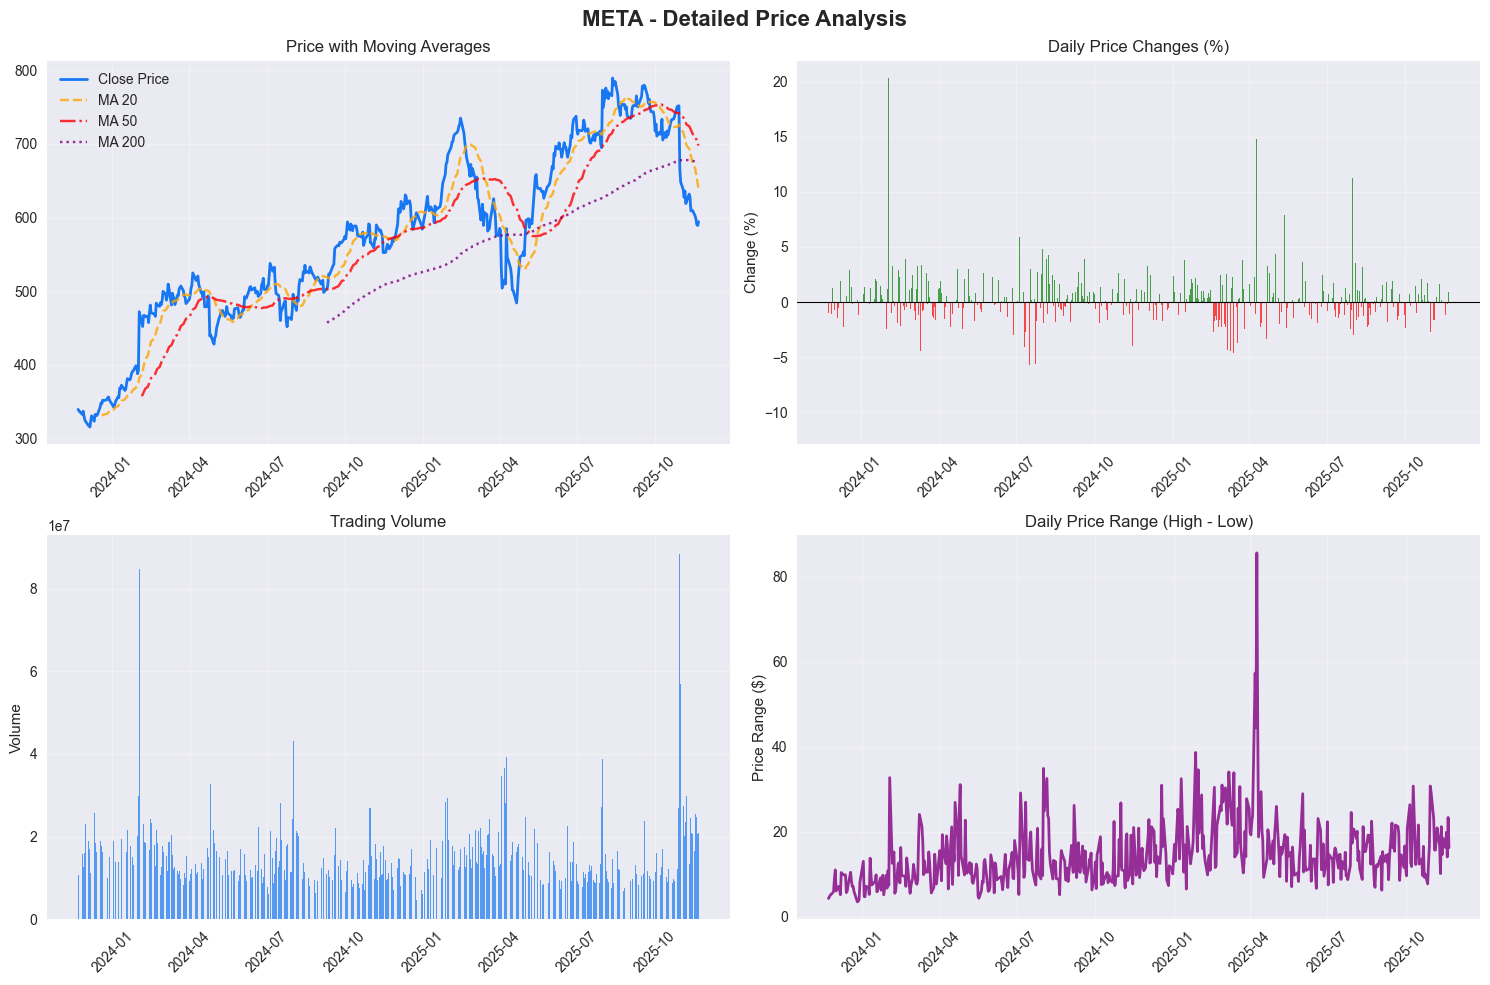

   💰 Current Price: $594.25
   📅 Analysis Period: 2023-11-22 to 2025-11-21
   📈 Total Return: 75.09%
   📊 Average Daily Volume: 15,102,161

📊 Analyzing MSFT...


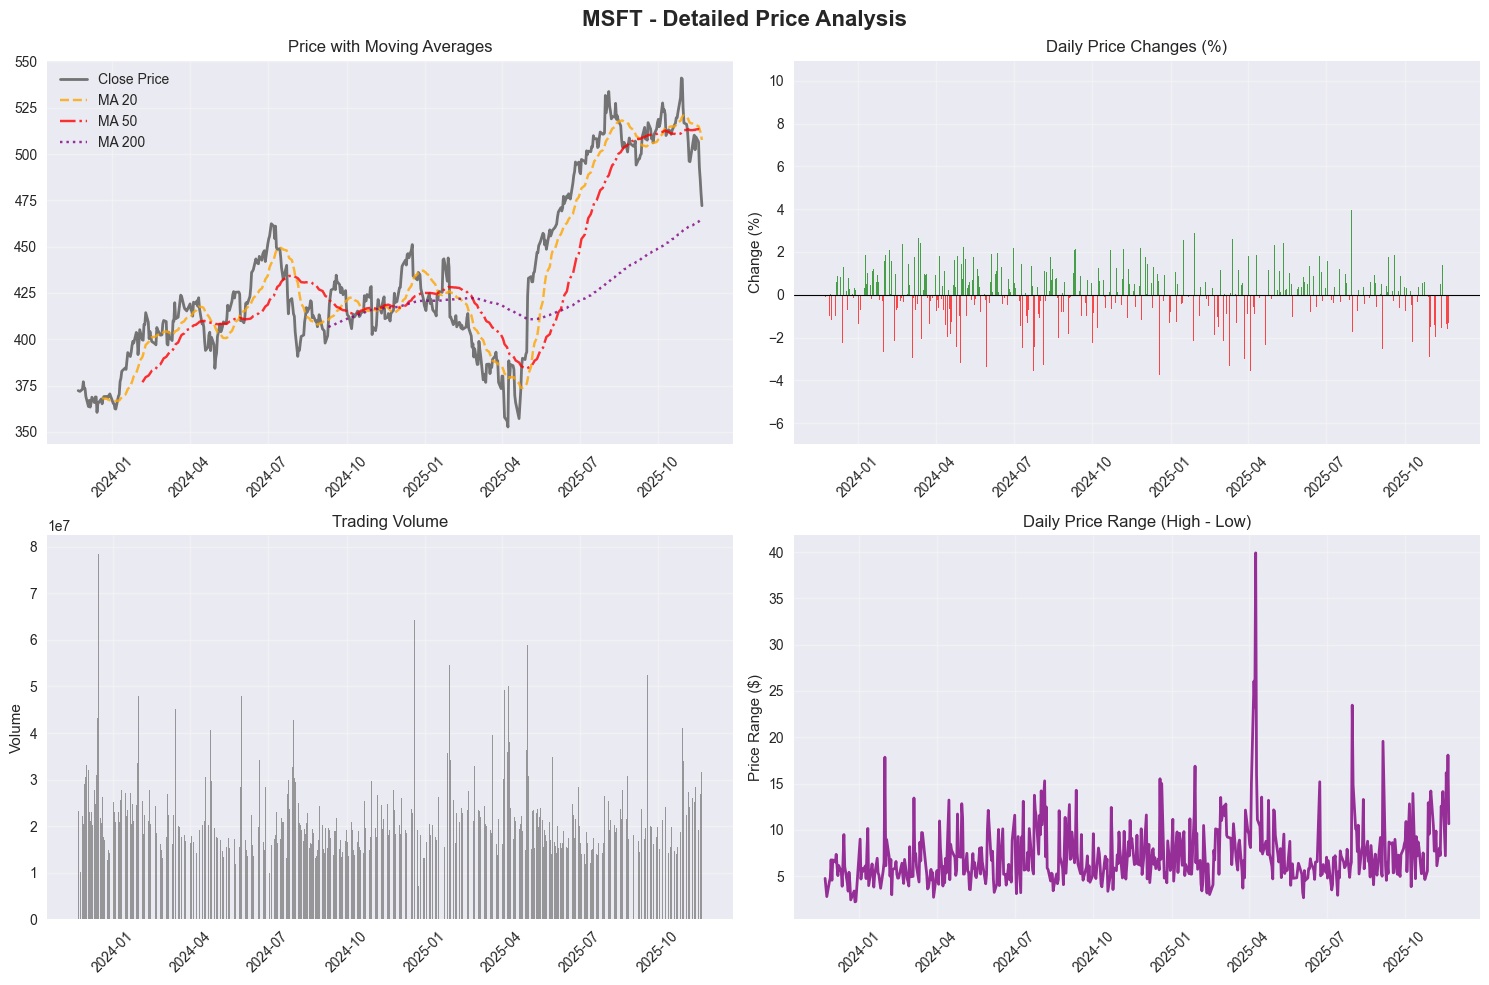

   💰 Current Price: $472.12
   📅 Analysis Period: 2023-11-22 to 2025-11-21
   📈 Total Return: 26.81%
   📊 Average Daily Volume: 21,503,543

📊 Analyzing NVDA...


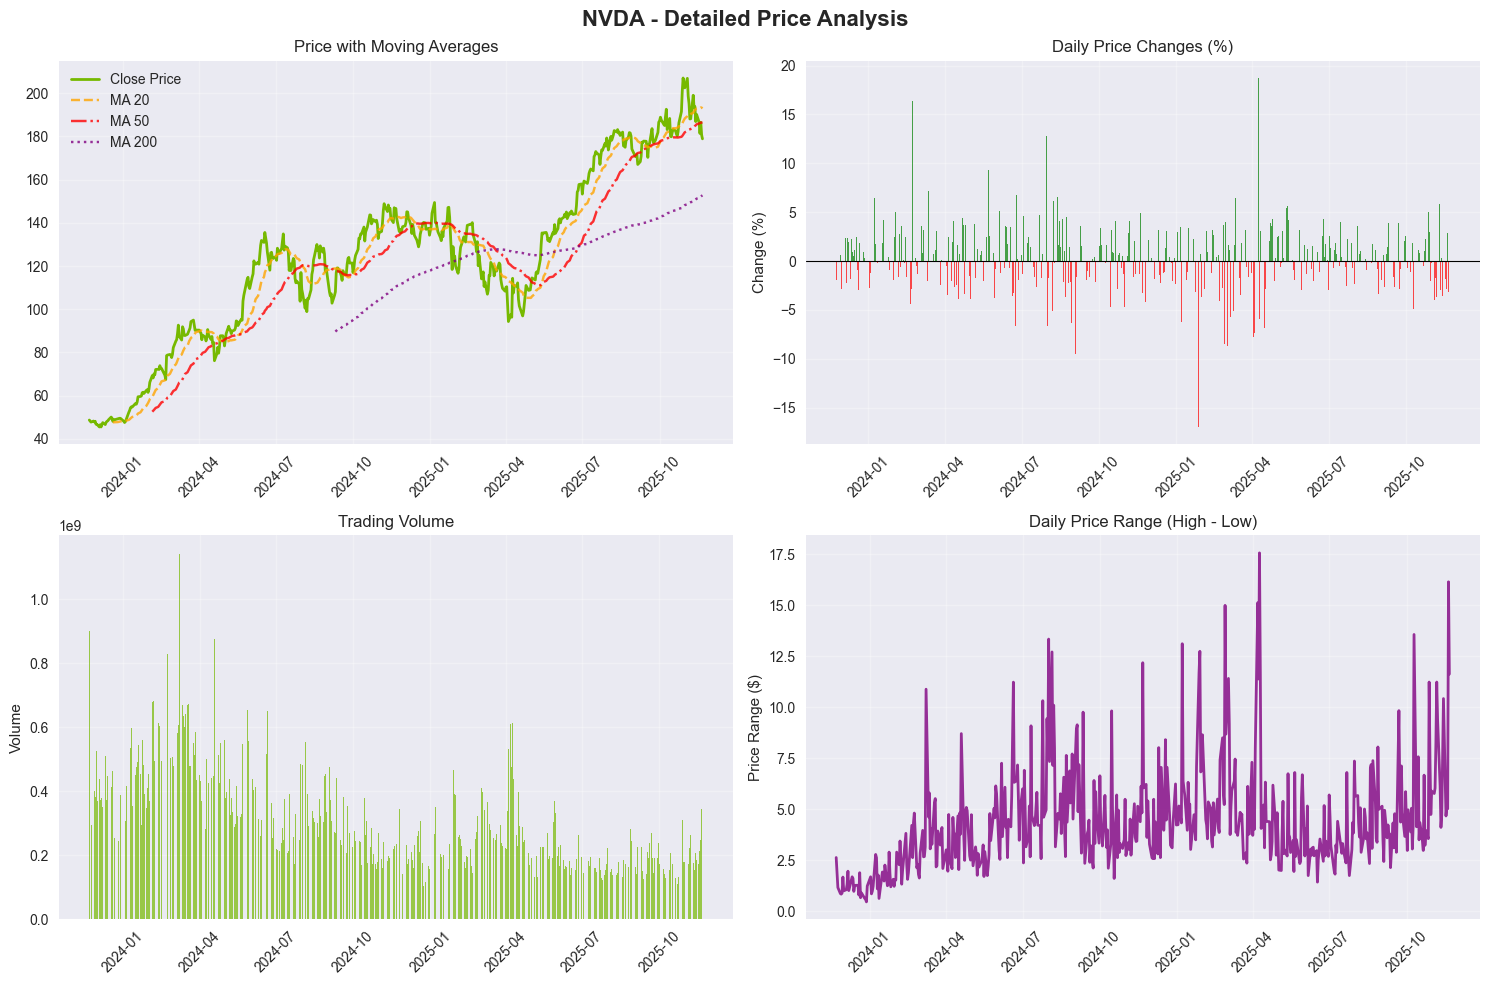

   💰 Current Price: $178.88
   📅 Analysis Period: 2023-11-22 to 2025-11-21
   📈 Total Return: 267.41%
   📊 Average Daily Volume: 310,832,258


In [5]:
# CELL 4: Individual Stock Price Analysis (FIXED)
print("🔍 INDIVIDUAL STOCK PRICE ANALYSIS")
print("=" * 50)

# FIX: Check if price_data exists and is not empty
if 'price_data' not in locals() or price_data.empty:
    print("❌ No data available. Please run previous cells first.")
else:
    # Create individual plots for each stock
    for ticker in TICKERS:
        print(f"\n📊 Analyzing {ticker}...")
        stock_data = price_data[price_data['Stock'] == ticker].sort_values('Date')
        
        if stock_data.empty:
            print(f"   ❌ No data for {ticker}")
            continue
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'{ticker} - Detailed Price Analysis', fontsize=16, fontweight='bold')
        
        # 1. Price with moving averages
        axes[0, 0].plot(stock_data['Date'], stock_data['Close'], 
                       color=company_colors[ticker], linewidth=2, label='Close Price')
        
        # Calculate and plot moving averages
        for period, color, style in [(20, 'orange', '--'), (50, 'red', '-.'), (200, 'purple', ':')]:
            if len(stock_data) >= period:
                ma = stock_data['Close'].rolling(window=period).mean()
                axes[0, 0].plot(stock_data['Date'], ma, color=color, linestyle=style, 
                               alpha=0.8, label=f'MA {period}')
        
        axes[0, 0].set_title('Price with Moving Averages')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # 2. Daily price changes
        daily_returns = stock_data['Close'].pct_change() * 100
        colors = ['green' if x >= 0 else 'red' for x in daily_returns]
        axes[0, 1].bar(stock_data['Date'], daily_returns, color=colors, alpha=0.7)
        axes[0, 1].axhline(0, color='black', linewidth=0.8)
        axes[0, 1].set_title('Daily Price Changes (%)')
        axes[0, 1].set_ylabel('Change (%)')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].tick_params(axis='x', rotation=45)
        
        # 3. Volume analysis
        axes[1, 0].bar(stock_data['Date'], stock_data['Volume'], 
                      color=company_colors[ticker], alpha=0.7)
        axes[1, 0].set_title('Trading Volume')
        axes[1, 0].set_ylabel('Volume')
        axes[1, 0].grid(True, alpha=0.3)
        axes[1, 0].tick_params(axis='x', rotation=45)
        
        # 4. Price range (High-Low)
        price_range = stock_data['High'] - stock_data['Low']
        axes[1, 1].plot(stock_data['Date'], price_range, 
                       color='purple', linewidth=2, alpha=0.8)
        axes[1, 1].set_title('Daily Price Range (High - Low)')
        axes[1, 1].set_ylabel('Price Range ($)')
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Print key statistics
        print(f"   💰 Current Price: ${stock_data['Close'].iloc[-1]:.2f}")
        print(f"   📅 Analysis Period: {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
        print(f"   📈 Total Return: {((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1) * 100:.2f}%")
        print(f"   📊 Average Daily Volume: {stock_data['Volume'].mean():,.0f}")

📊 SIMPLE PRICE ACTION VISUALIZATION


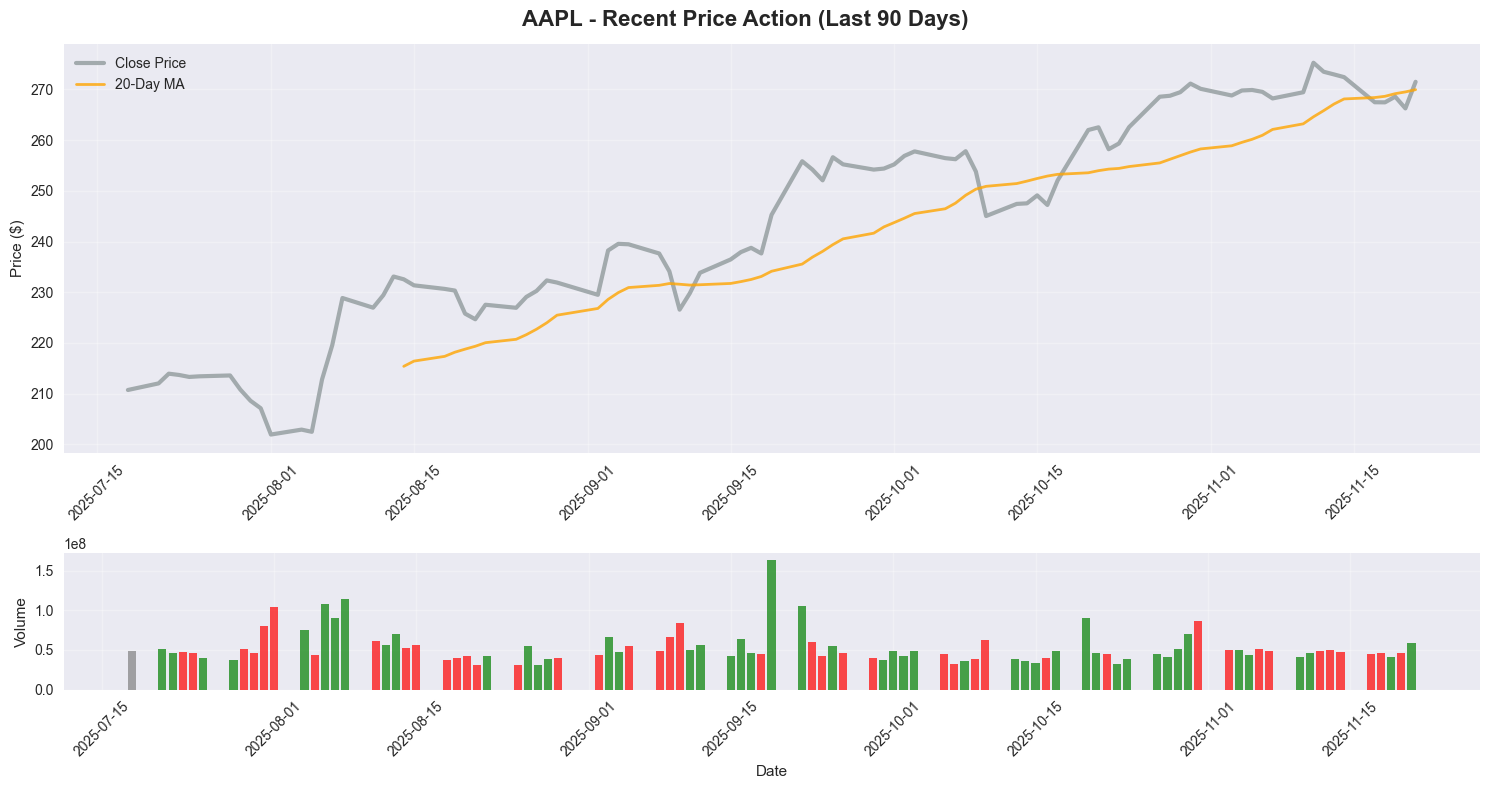

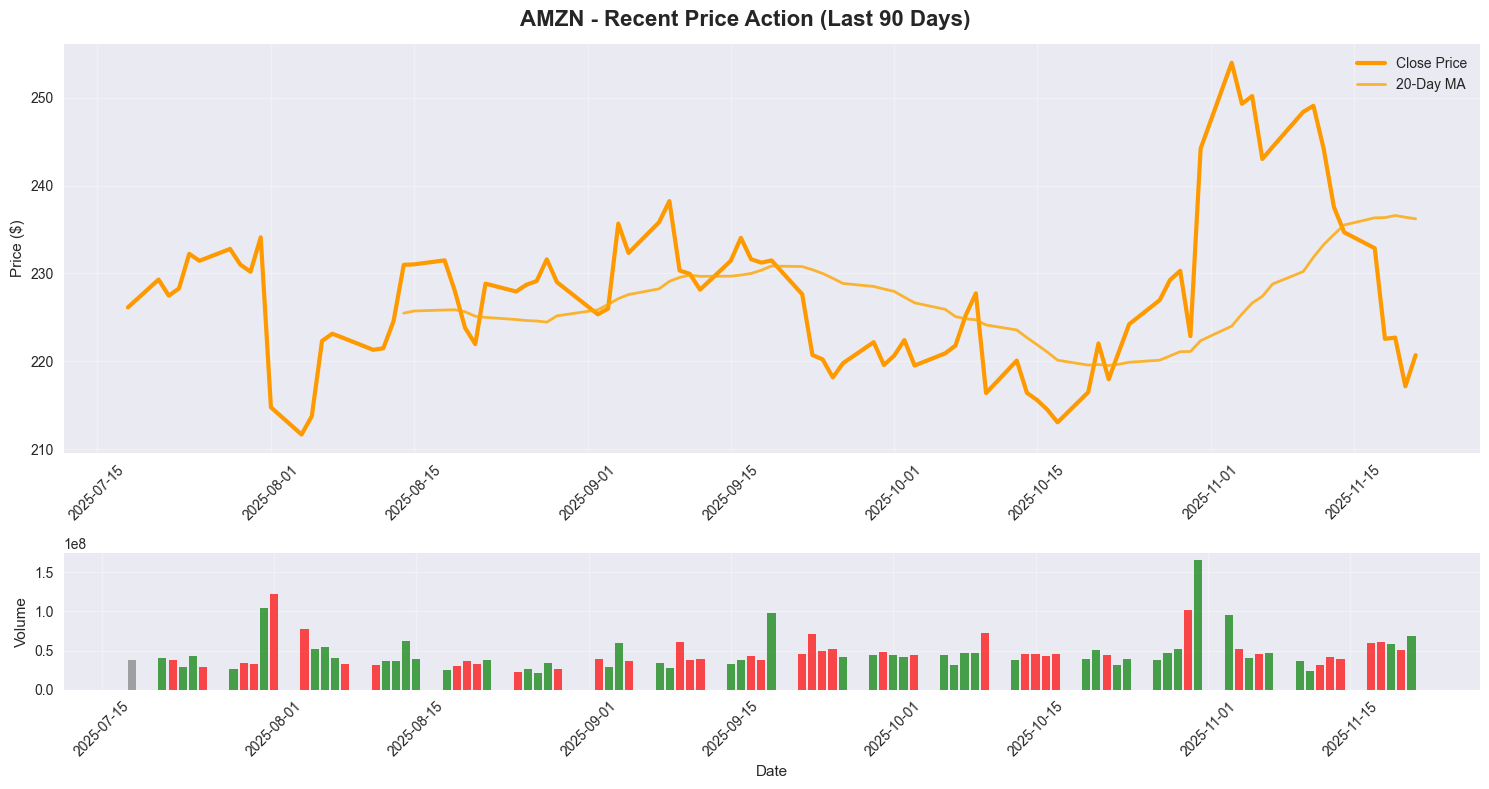

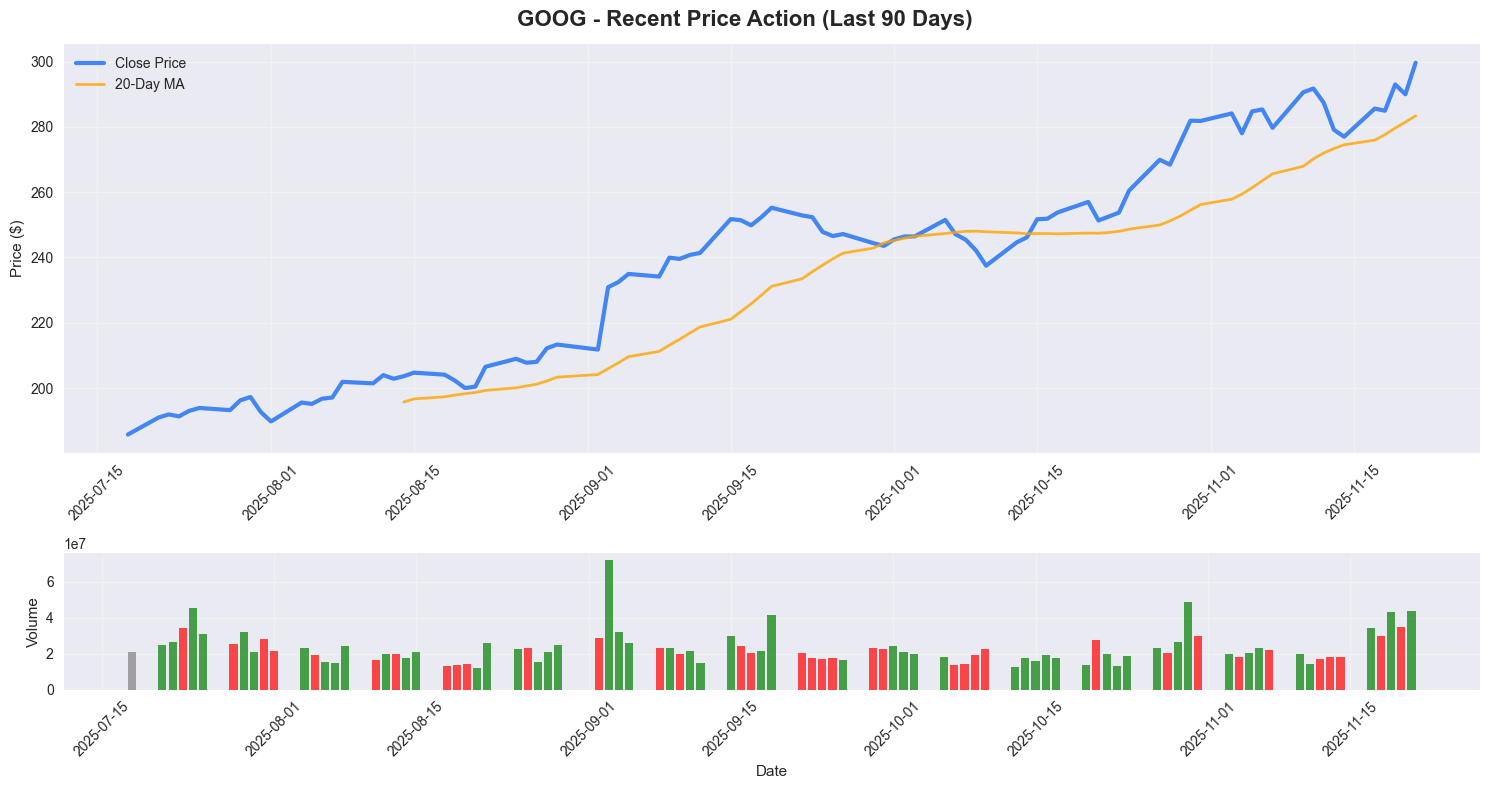

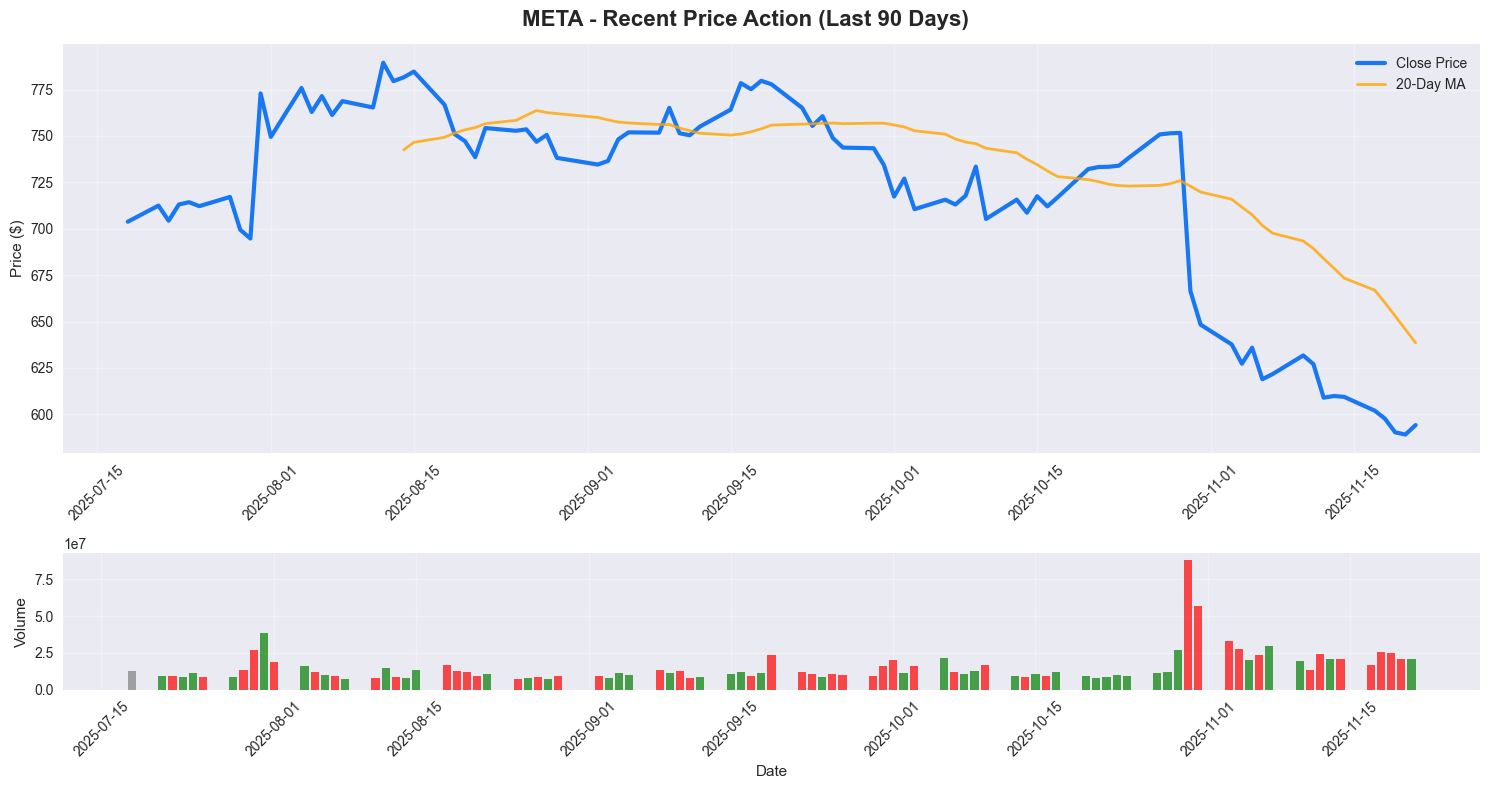

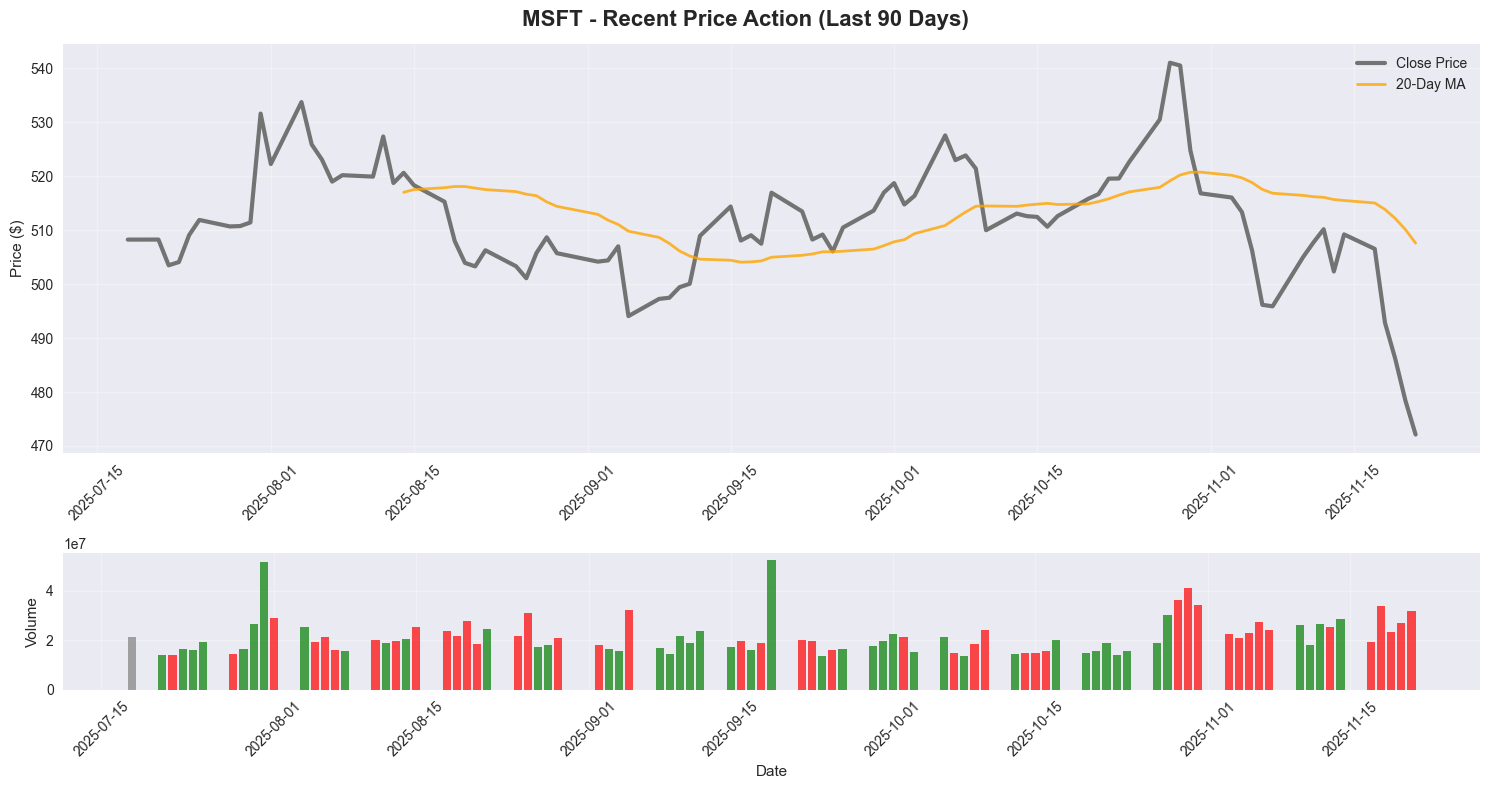

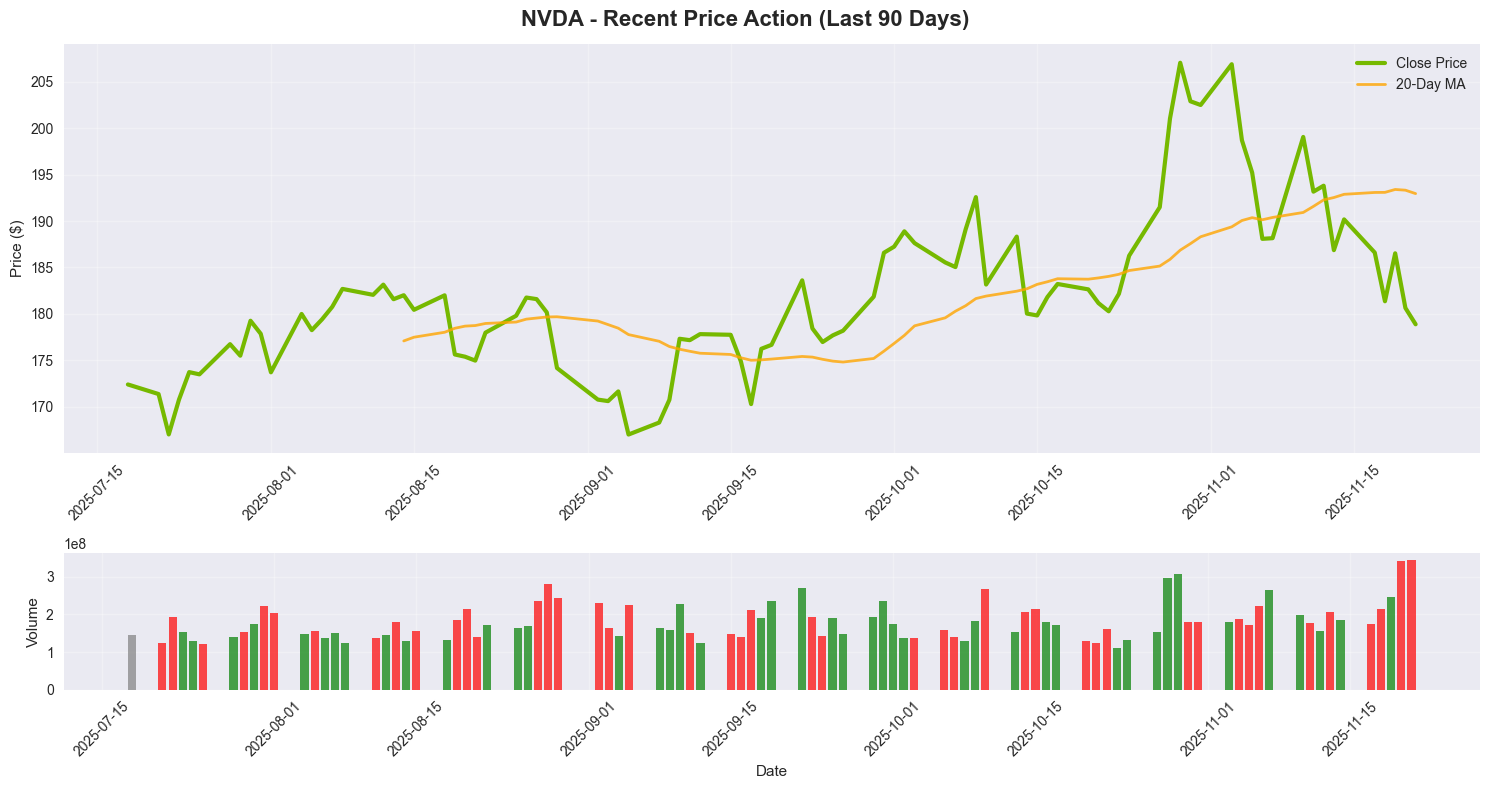

In [6]:
# CELL 5: Simple Price Action Visualization (FIXED)
print("📊 SIMPLE PRICE ACTION VISUALIZATION")
print("=" * 50)

if 'price_data' not in locals() or price_data.empty:
    print("❌ No data available. Please run previous cells first.")
else:
    # Create simplified price action plots for each stock
    for ticker in TICKERS:
        stock_data = price_data[price_data['Stock'] == ticker].sort_values('Date')
        if len(stock_data) < 30:  # Skip if not enough data
            continue
            
        # Use last 90 days for cleaner visualization
        recent_data = stock_data.tail(90).copy()
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), 
                                      gridspec_kw={'height_ratios': [3, 1]})
        fig.suptitle(f'{ticker} - Recent Price Action (Last 90 Days)', 
                    fontsize=16, fontweight='bold')
        
        # Price chart with trend
        ax1.plot(recent_data['Date'], recent_data['Close'], 
                color=company_colors[ticker], linewidth=3, label='Close Price')
        
        # Add simple moving averages
        if len(recent_data) >= 20:
            ma_20 = recent_data['Close'].rolling(window=20).mean()
            ax1.plot(recent_data['Date'], ma_20, 'orange', linewidth=2, 
                    label='20-Day MA', alpha=0.8)
        
        ax1.set_ylabel('Price ($)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.tick_params(axis='x', rotation=45)
        
        # Volume bars with color based on price movement
        price_changes = recent_data['Close'].pct_change()
        colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' 
                 for x in price_changes]
        
        ax2.bar(recent_data['Date'], recent_data['Volume'], 
               color=colors, alpha=0.7)
        ax2.set_ylabel('Volume')
        ax2.set_xlabel('Date')
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

🏆 PERFORMANCE COMPARISON ANALYSIS


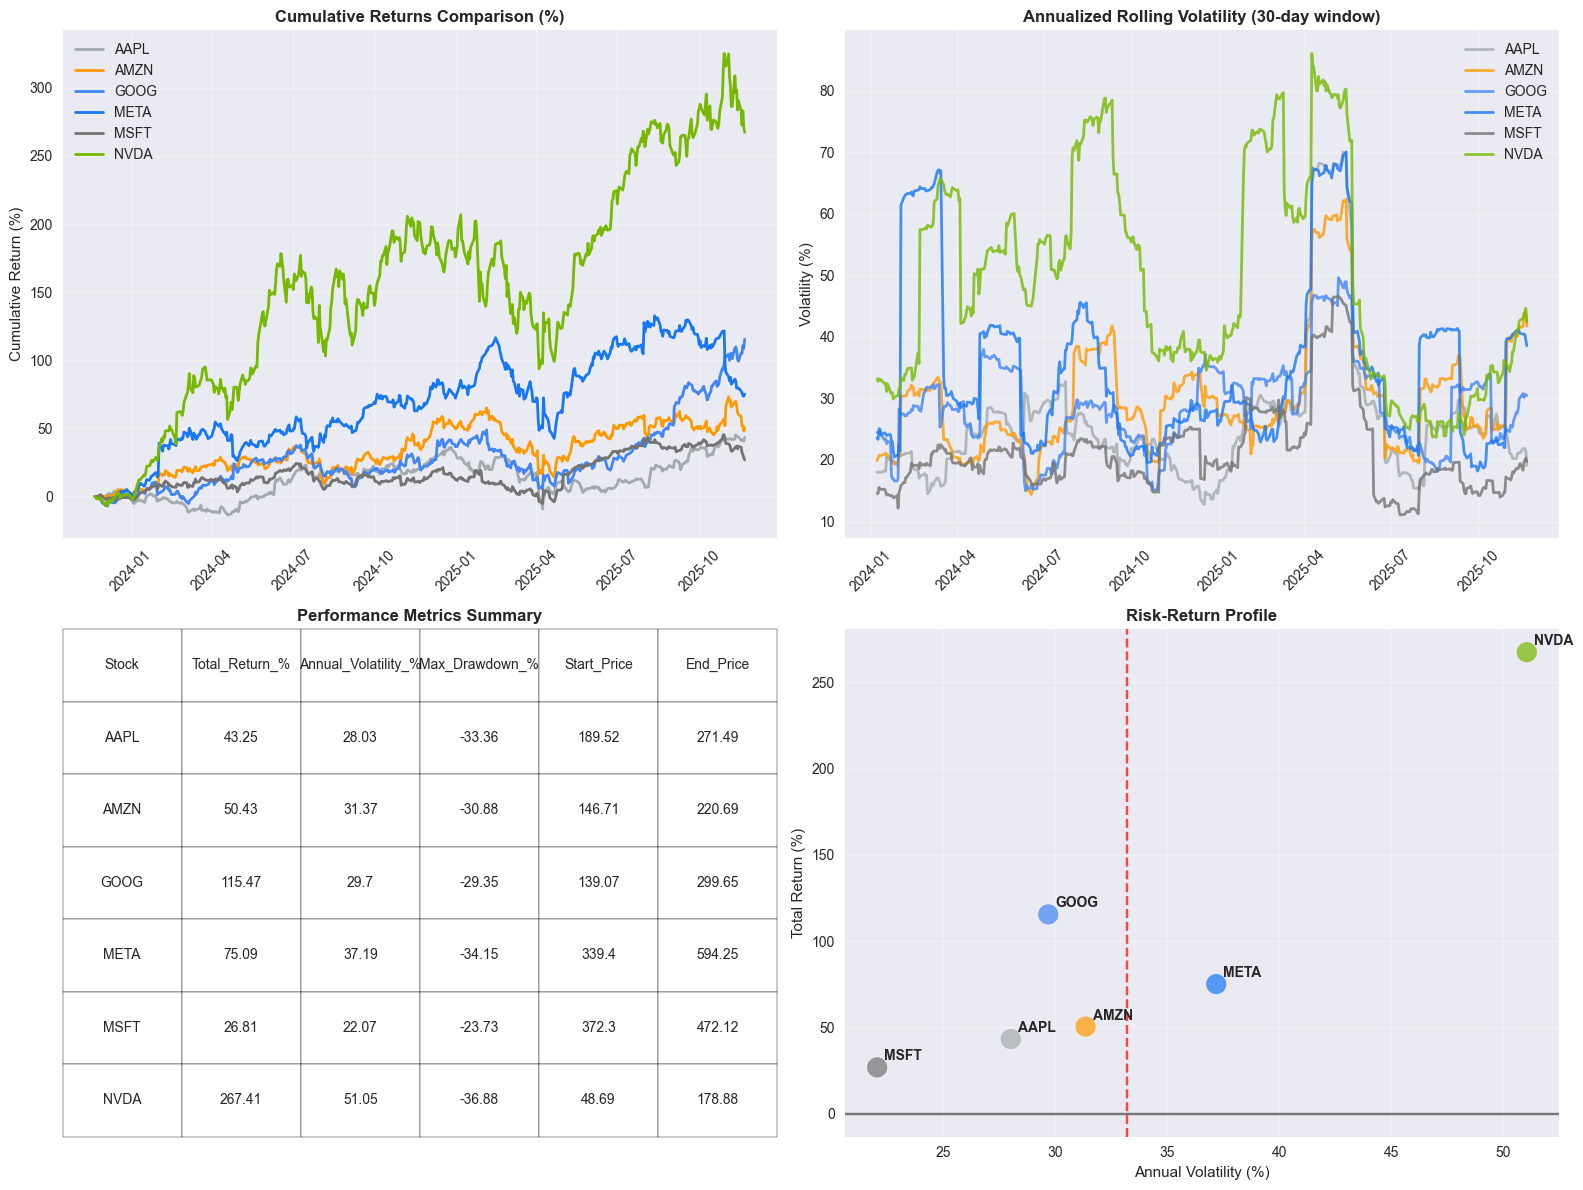


📊 PERFORMANCE SUMMARY:


,Stock,Total_Return_%,Annual_Volatility_%,Max_Drawdown_%,Start_Price,End_Price
5,NVDA,267.405843,51.047884,-36.881027,48.687305,178.880005
2,GOOG,115.469663,29.701797,-29.350061,139.068298,299.649994
3,META,75.089575,37.194605,-34.150815,339.397705,594.250000
1,AMZN,50.426005,31.367079,-30.876638,146.710007,220.690002
0,AAPL,43.251237,28.029471,-33.360523,189.520172,271.489990
4,MSFT,26.812015,22.070414,-23.726644,372.299103,472.119995


In [7]:
# CELL 6: Performance Comparison Analysis (FIXED)
print("🏆 PERFORMANCE COMPARISON ANALYSIS")
print("=" * 50)

if 'price_data' not in locals() or price_data.empty:
    print("❌ No data available. Please run previous cells first.")
else:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Cumulative returns comparison
    ax1 = axes[0, 0]
    for ticker in TICKERS:
        stock_data = price_data[price_data['Stock'] == ticker].sort_values('Date')
        if not stock_data.empty:
            cumulative_return = (stock_data['Close'] / stock_data['Close'].iloc[0] - 1) * 100
            ax1.plot(stock_data['Date'], cumulative_return, 
                    label=ticker, color=company_colors[ticker], linewidth=2)
    ax1.set_title('Cumulative Returns Comparison (%)', fontweight='bold')
    ax1.set_ylabel('Cumulative Return (%)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # 2. Rolling volatility (30-day)
    ax2 = axes[0, 1]
    for ticker in TICKERS:
        stock_data = price_data[price_data['Stock'] == ticker].sort_values('Date')
        if not stock_data.empty and len(stock_data) > 30:
            volatility = stock_data['Close'].pct_change().rolling(window=30).std() * 100 * np.sqrt(252)
            ax2.plot(stock_data['Date'], volatility, 
                    label=ticker, color=company_colors[ticker], linewidth=2, alpha=0.8)
    ax2.set_title('Annualized Rolling Volatility (30-day window)', fontweight='bold')
    ax2.set_ylabel('Volatility (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)

    # 3. Performance metrics table
    performance_data = []
    for ticker in TICKERS:
        stock_data = price_data[price_data['Stock'] == ticker].sort_values('Date')
        if not stock_data.empty:
            total_return = (stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0] - 1) * 100
            volatility = stock_data['Close'].pct_change().std() * 100 * np.sqrt(252) if len(stock_data) > 1 else 0
            max_drawdown = (stock_data['Close'] / stock_data['Close'].cummax() - 1).min() * 100
            
            performance_data.append({
                'Stock': ticker,
                'Total_Return_%': total_return,
                'Annual_Volatility_%': volatility,
                'Max_Drawdown_%': max_drawdown,
                'Start_Price': stock_data['Close'].iloc[0],
                'End_Price': stock_data['Close'].iloc[-1]
            })

    performance_df = pd.DataFrame(performance_data)

    # Create a table
    ax3 = axes[1, 0]
    ax3.axis('tight')
    ax3.axis('off')
    if not performance_df.empty:
        table = ax3.table(cellText=performance_df.round(2).values,
                         colLabels=performance_df.columns,
                         cellLoc='center',
                         loc='center',
                         bbox=[0, 0, 1, 1])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
    ax3.set_title('Performance Metrics Summary', fontweight='bold')

    # 4. Risk-Return scatter plot
    ax4 = axes[1, 1]
    if not performance_df.empty:
        scatter = ax4.scatter(performance_df['Annual_Volatility_%'], 
                             performance_df['Total_Return_%'],
                             s=200, alpha=0.7,
                             c=[company_colors[t] for t in performance_df['Stock']])

        # Add labels for each point
        for i, row in performance_df.iterrows():
            ax4.annotate(row['Stock'], 
                        (row['Annual_Volatility_%'], row['Total_Return_%']),
                        xytext=(5, 5), textcoords='offset points',
                        fontweight='bold')

        ax4.set_xlabel('Annual Volatility (%)')
        ax4.set_ylabel('Total Return (%)')
        ax4.set_title('Risk-Return Profile', fontweight='bold')
        ax4.grid(True, alpha=0.3)

        # Add quadrant lines
        ax4.axhline(0, color='black', linestyle='-', alpha=0.5)
        if len(performance_df) > 0:
            ax4.axvline(performance_df['Annual_Volatility_%'].mean(), 
                       color='red', linestyle='--', alpha=0.7, label='Avg Volatility')

    plt.tight_layout()
    plt.show()

    # Print performance summary
    print("\n📊 PERFORMANCE SUMMARY:")
    if not performance_df.empty:
        display(performance_df.sort_values('Total_Return_%', ascending=False))

🔗 CORRELATION ANALYSIS


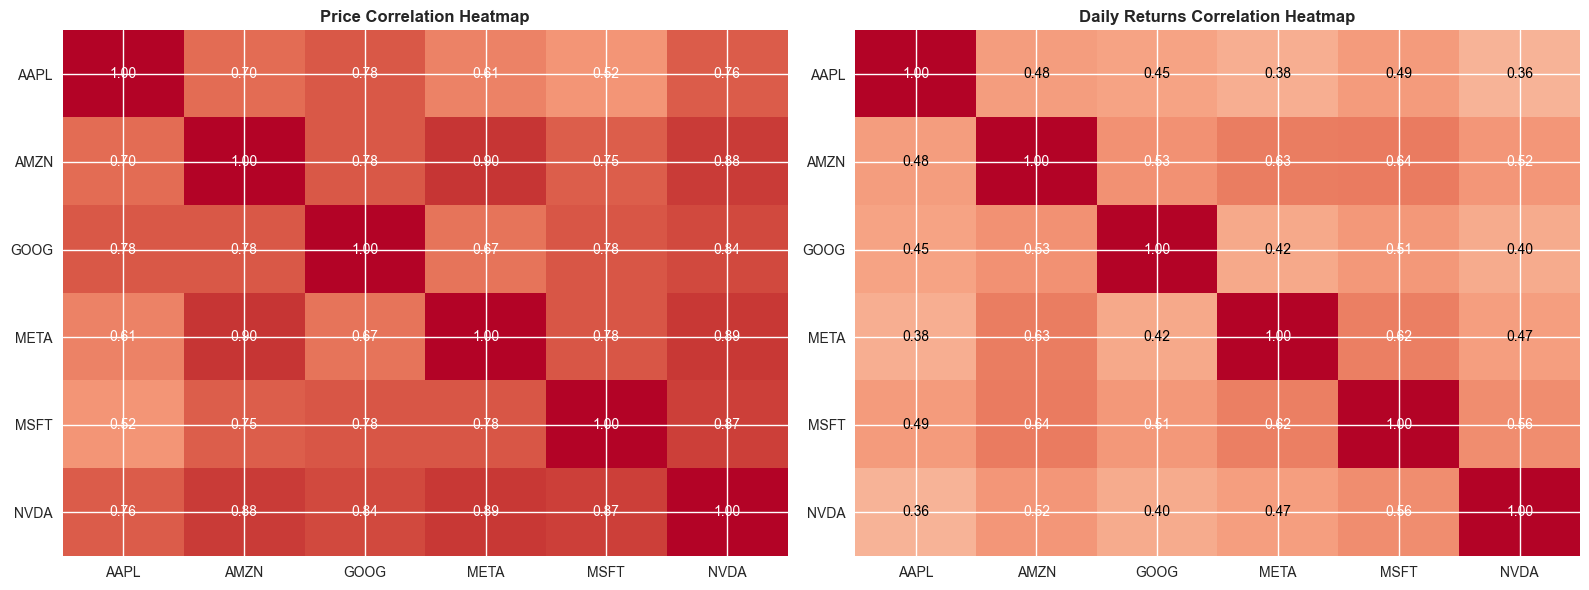


💡 CORRELATION INSIGHTS:
Highest Correlations:
   META-AMZN: 0.896
   AMZN-META: 0.896
   NVDA-META: 0.886

Lowest Correlations:
   AAPL-MSFT: 0.522
   MSFT-AAPL: 0.522
   META-AAPL: 0.607


In [8]:
# CELL 7: Correlation Analysis (FIXED)
print("🔗 CORRELATION ANALYSIS")
print("=" * 50)

if 'price_data' not in locals() or price_data.empty:
    print("❌ No data available. Please run previous cells first.")
else:
    # Create pivot table for closing prices
    close_prices_pivot = price_data.pivot(index='Date', columns='Stock', values='Close')
    
    # Remove any columns with all NaN values
    close_prices_pivot = close_prices_pivot.dropna(axis=1, how='all')
    
    if not close_prices_pivot.empty and len(close_prices_pivot.columns) > 1:
        # Calculate correlation matrix
        correlation_matrix = close_prices_pivot.corr()

        # Calculate daily returns correlation
        returns_pivot = close_prices_pivot.pct_change().dropna()
        returns_correlation = returns_pivot.corr()

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # 1. Price correlation heatmap
        im1 = ax1.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        ax1.set_xticks(range(len(correlation_matrix.columns)))
        ax1.set_yticks(range(len(correlation_matrix.columns)))
        ax1.set_xticklabels(correlation_matrix.columns)
        ax1.set_yticklabels(correlation_matrix.columns)
        ax1.set_title('Price Correlation Heatmap', fontweight='bold')

        # Add correlation values to heatmap
        for i in range(len(correlation_matrix.columns)):
            for j in range(len(correlation_matrix.columns)):
                ax1.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                        ha='center', va='center', 
                        color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

        # 2. Returns correlation heatmap
        im2 = ax2.imshow(returns_correlation, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        ax2.set_xticks(range(len(returns_correlation.columns)))
        ax2.set_yticks(range(len(returns_correlation.columns)))
        ax2.set_xticklabels(returns_correlation.columns)
        ax2.set_yticklabels(returns_correlation.columns)
        ax2.set_title('Daily Returns Correlation Heatmap', fontweight='bold')

        # Add correlation values to heatmap
        for i in range(len(returns_correlation.columns)):
            for j in range(len(returns_correlation.columns)):
                ax2.text(j, i, f'{returns_correlation.iloc[i, j]:.2f}',
                        ha='center', va='center', 
                        color='white' if abs(returns_correlation.iloc[i, j]) > 0.5 else 'black')

        plt.tight_layout()
        plt.show()

        # Print correlation insights
        print("\n💡 CORRELATION INSIGHTS:")
        print("Highest Correlations:")
        high_corr = correlation_matrix.unstack().sort_values(ascending=False)
        high_corr = high_corr[high_corr < 1.0]  # Remove self-correlations
        for pair, value in high_corr.head(3).items():
            print(f"   {pair[0]}-{pair[1]}: {value:.3f}")

        print("\nLowest Correlations:")
        low_corr = correlation_matrix.unstack().sort_values()
        for pair, value in low_corr.head(3).items():
            print(f"   {pair[0]}-{pair[1]}: {value:.3f}")
    else:
        print("❌ Not enough data for correlation analysis.")